In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [20]:
DATA_CSV = '../data/history/flightsHistory.csv.gz'
data_og = pd.read_csv(DATA_CSV)
data_og.head()

/Users/longhoang/opt/anaconda3/envs/cs224n/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Row,flight_iata,airline_iata,dep_time_utc,dep_actual_utc,arr_time_utc,arr_actual_utc,dep_iata,arr_iata,dep_country_code,...,dep_rain,dep_snowfall,dep_weather_code,dep_cloud_cover,dep_cloud_cover_low,dep_cloud_cover_mid,dep_cloud_cover_high,dep_wind_speed_10m,dep_wind_speed_100m,dep_wind_gusts_10m
0,0,vn30,vn,2022-10-17 14:35:00,2022-10-17 14:54:00,2022-10-18 07:55:00,2022-10-18 06:59:00,FRA,SGN,DE,...,0.0,0.0,3.0,82.199997,53.0,9.0,97.0,6.297428,13.708390,18.000000
1,1,qh74,qh,2022-10-17 20:10:00,2022-10-17 20:31:00,2022-10-18 12:50:00,2022-10-18 12:02:00,FRA,HAN,DE,...,0.0,0.0,2.0,78.000000,0.0,93.0,74.0,6.638072,13.551500,11.520000
2,2,vj910,vj,2022-10-18 01:25:00,2022-10-18 02:45:00,2022-10-18 07:45:00,NaN,BOM,HAN,IN,...,0.2,0.0,51.0,76.200005,22.0,44.0,100.0,3.219938,5.116561,9.000000
3,3,qr970,qr,2022-10-18 02:35:00,2022-10-18 03:03:00,2022-10-18 14:25:00,2022-10-18 14:07:00,DOH,SGN,QA,...,0.0,0.0,0.0,9.900001,0.0,0.0,33.0,11.966953,20.523155,17.280001
4,4,tk162,tk,2022-10-18 02:45:00,2022-10-18 02:40:00,2022-10-18 17:05:00,2022-10-18 16:06:00,IST,SGN,TR,...,0.0,0.0,2.0,61.199997,68.0,0.0,0.0,26.987997,39.463947,46.439999


In [21]:
# Select just columns related to weather and delay time
weather_num_cols = [
    'arr_latitude', 'arr_longitude',
    'arr_temperature_2m', 'arr_relative_humidity_2m', 'arr_precipitation', 'arr_rain', 'arr_snowfall',
    'arr_cloud_cover', 'arr_cloud_cover_low', 'arr_cloud_cover_mid', 'arr_cloud_cover_high',
    'arr_wind_speed_10m', 'arr_wind_speed_100m', 'arr_wind_gusts_10m', 'dep_latitude',
    'dep_longitude', 'dep_temperature_2m', 'dep_relative_humidity_2m', 'dep_precipitation', 'dep_rain',
    'dep_snowfall', 'dep_cloud_cover', 'dep_cloud_cover_low', 'dep_cloud_cover_mid',
    'dep_cloud_cover_high', 'dep_wind_speed_10m', 'dep_wind_speed_100m', 'dep_wind_gusts_10m'
]
weather_cat_cols = ['arr_weather_code', 'dep_weather_code']

data = data_og[weather_num_cols + weather_cat_cols + ['delayed']].copy()
data

,arr_latitude,arr_longitude,arr_temperature_2m,arr_relative_humidity_2m,arr_precipitation,arr_rain,arr_snowfall,arr_cloud_cover,arr_cloud_cover_low,arr_cloud_cover_mid,...,dep_cloud_cover,dep_cloud_cover_low,dep_cloud_cover_mid,dep_cloud_cover_high,dep_wind_speed_10m,dep_wind_speed_100m,dep_wind_gusts_10m,arr_weather_code,dep_weather_code,delayed
0,10.8188,106.652,29.598000,73.455696,0.5,0.5,0.0,100.000000,100.0,9.0,...,82.199997,53.0,9.0,97.0,6.297428,13.708390,18.000000,53.0,3.0,-56.0
1,21.2212,105.807,23.088999,48.819229,0.0,0.0,0.0,3.000000,0.0,0.0,...,78.000000,0.0,93.0,74.0,6.638072,13.551500,11.520000,0.0,2.0,-48.0
2,21.2212,105.807,27.739000,39.287140,0.0,0.0,0.0,14.700001,0.0,0.0,...,76.200005,22.0,44.0,100.0,3.219938,5.116561,9.000000,0.0,51.0,53.0
3,10.8188,106.652,24.548000,88.643417,0.1,0.1,0.0,46.800003,4.0,29.0,...,9.900001,0.0,0.0,33.0,11.966953,20.523155,17.280001,51.0,0.0,-18.0
4,10.8188,106.652,24.048000,94.435860,0.0,0.0,0.0,37.200001,1.0,12.0,...,61.199997,68.0,0.0,0.0,26.987997,39.463947,46.439999,1.0,2.0,-59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370191,10.1698,103.993,30.543499,72.094849,0.0,0.0,0.0,36.900002,2.0,9.0,...,0.000000,0.0,0.0,0.0,25.501621,27.438046,38.160000,1.0,0.0,-25.0
370192,10.8188,106.652,31.497999,63.555786,0.0,0.0,0.0,43.200001,8.0,11.0,...,45.300003,27.0,2.0,66.0,22.331610,29.079889,31.680000,1.0,1.0,15.0
370193,16.0439,108.199,24.483000,86.770721,4.8,4.8,0.0,100.000000,93.0,66.0,...,54.000000,2.0,37.0,100.0,7.072878,9.000000,25.559999,63.0,2.0,-14.0
370194,12.6683,108.120,27.165001,64.992615,0.2,0.2,0.0,84.000000,21.0,59.0,...,43.200001,8.0,11.0,98.0,6.608722,7.903619,16.919998,51.0,1.0,-10.0


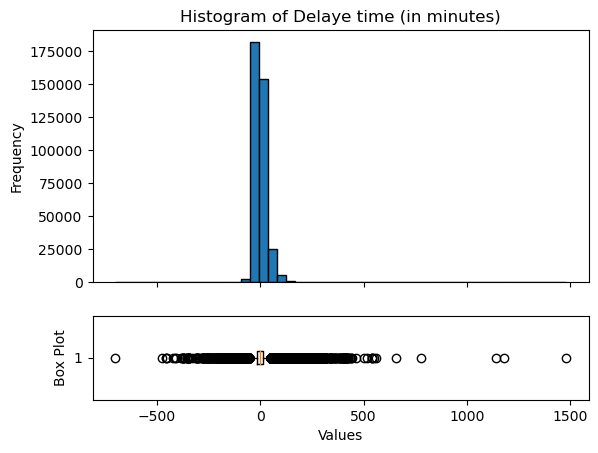

count    370196.000000
mean          1.006302
std          29.693936
min        -703.000000
25%         -16.000000
50%          -4.000000
75%          11.000000
max        1479.000000
Name: delayed, dtype: float64


In [162]:
# Assuming 'delayed' is a column in your DataFrame
# Replace this with the actual column name from your DataFrame
y = data['delayed'].copy()

# Create a figure with two subplots (histogram and box plot)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Histogram with log scale
ax1.hist(y.dropna(), bins=50, edgecolor='black')
ax1.set_title('Histogram of Delaye time (in minutes)')
ax1.set_ylabel('Frequency')

# Box plot
ax2.boxplot(y.dropna(), vert=False)
ax2.set_xlabel('Values')
ax2.set_ylabel('Box Plot')

plt.show()

# Display descriptive statistics
print(y.describe())



Draw y in log scale for easier visualization

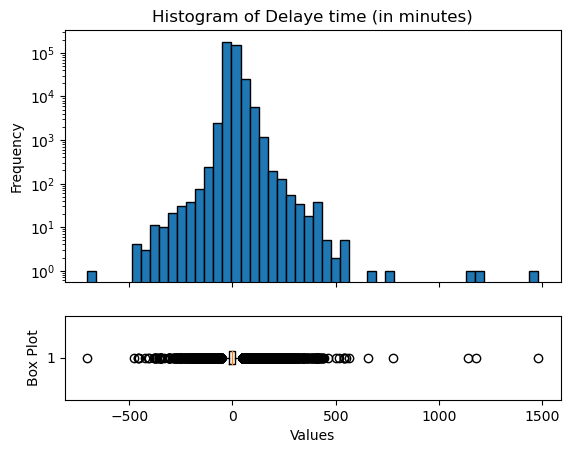

count    370196.000000
mean          1.006302
std          29.693936
min        -703.000000
25%         -16.000000
50%          -4.000000
75%          11.000000
max        1479.000000
Name: delayed, dtype: float64


In [ ]:
# Assuming 'delayed' is a column in your DataFrame
# Replace this with the actual column name from your DataFrame
y = data['delayed'].copy()

# Create a figure with two subplots (histogram and box plot)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Histogram with log scale
ax1.hist(y.dropna(), bins=50, edgecolor='black')
ax1.set_title('Histogram of Delaye time (in minutes)')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')  # Set log scale for the y-axis

# Box plot
ax2.boxplot(y.dropna(), vert=False)
ax2.set_xlabel('Values')
ax2.set_ylabel('Box Plot')

plt.show()

# Display descriptive statistics
print(y.describe())



<AxesSubplot:>

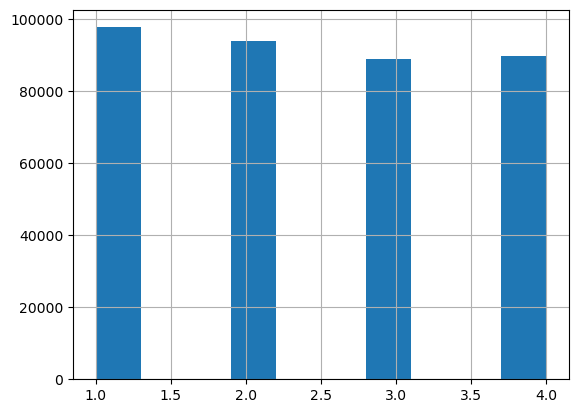

In [23]:
data['delay_bin'] = pd.cut(y, [-np.inf, -16, -4, 11, np.inf], labels=[1,2,3,4])
data.delay_bin.hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_ix, test_ix in ss.split(data, data.delay_bin):
    train_val_set = data.iloc[train_ix]
    test_set = data.iloc[test_ix]

for train_ix, val_ix in ss.split(train_val_set, train_val_set.delay_bin):
    train_set = data.iloc[train_ix]  # Use train_val_set instead of data
    val_set = data.iloc[val_ix]      # Use train_val_set instead of data

In [25]:
# Check correctness
print(f'\nOrig: {len(data)} samples\n{data.delay_bin.value_counts() / len(data)}')
print(f'\nTrain: {len(train_set)} samples\n{train_set.delay_bin.value_counts() / len(train_set)}')
print(f'\nValidation: {len(val_set)} samples\n{val_set.delay_bin.value_counts() / len(val_set)}')
print(f'\nTest: {len(test_set)} samples\n{test_set.delay_bin.value_counts() / len(test_set)}')


Orig: 370196 samples
1    0.263785
2    0.253571
4    0.242542
3    0.240103
Name: delay_bin, dtype: float64

Train: 299858 samples
1    0.257875
2    0.252376
4    0.247717
3    0.242031
Name: delay_bin, dtype: float64

Validation: 33318 samples
1    0.254787
2    0.254247
4    0.248394
3    0.242572
Name: delay_bin, dtype: float64

Test: 37020 samples
1    0.263776
2    0.253566
4    0.242545
3    0.240113
Name: delay_bin, dtype: float64


In [26]:
# drop 'delay_bin' column
for set_ in (train_set, val_set, test_set):
    set_.drop('delay_bin', axis=1, inplace=True)

/Users/longhoang/opt/anaconda3/envs/cs224n/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
cm = train_set.corr()
cm['delayed'].sort_values(ascending=False)

delayed                     1.000000
arr_relative_humidity_2m    0.093573
dep_relative_humidity_2m    0.086411
dep_cloud_cover_high        0.062172
arr_cloud_cover_high        0.045390
arr_cloud_cover_mid         0.031073
arr_latitude                0.028273
arr_cloud_cover             0.027929
dep_cloud_cover_mid         0.022694
dep_snowfall                0.013466
dep_cloud_cover             0.010782
dep_precipitation           0.002899
dep_rain                    0.002754
arr_snowfall                0.002620
dep_weather_code           -0.000158
arr_precipitation          -0.002543
arr_rain                   -0.002553
arr_cloud_cover_low        -0.002693
arr_weather_code           -0.005138
arr_longitude              -0.005432
dep_temperature_2m         -0.008011
arr_wind_speed_100m        -0.017108
dep_wind_speed_100m        -0.020711
dep_cloud_cover_low        -0.032744
dep_longitude              -0.036739
dep_latitude               -0.037315
arr_wind_speed_10m         -0.046949
a

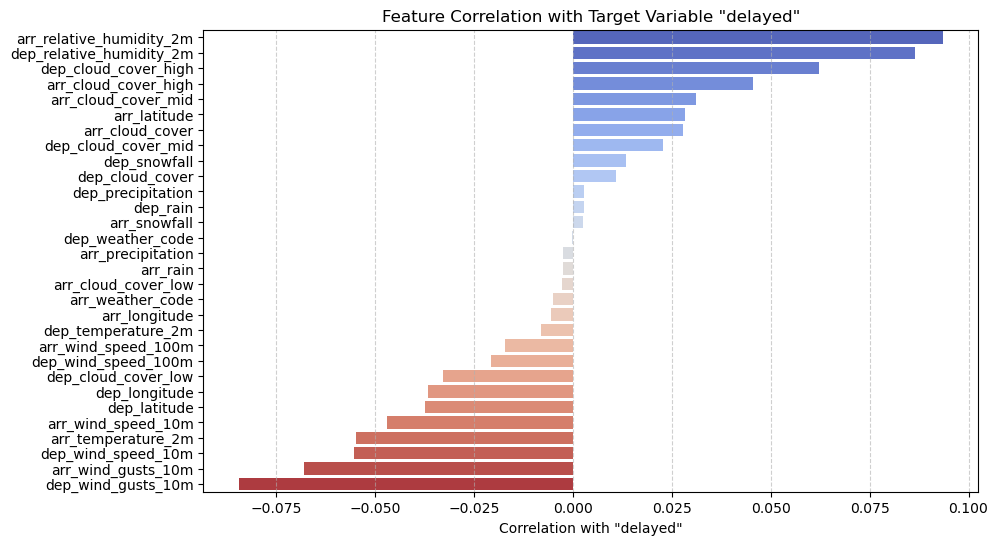

In [154]:
import seaborn as sns

# Assuming cm is the correlation matrix and 'delayed' is the target variable
cm = train_set.corr()
correlation_with_delayed = cm['delayed'].drop('delayed').sort_values(ascending=False)

# Plotting the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_delayed.values, y=correlation_with_delayed.index, palette='coolwarm')

# Adding labels and title
plt.xlabel('Correlation with "delayed"')
plt.title('Feature Correlation with Target Variable "delayed"')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

Text(0, 0.5, 'Delay time')

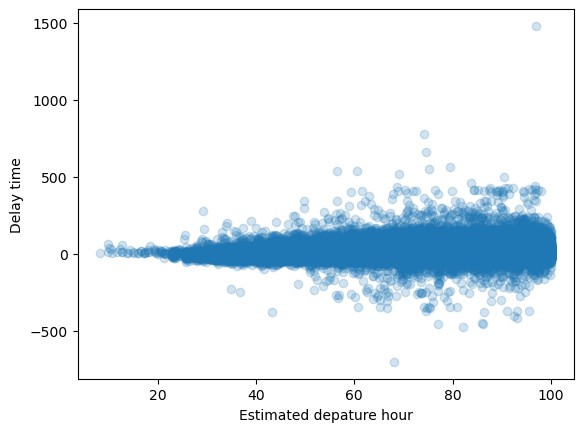

In [28]:
plt.scatter(train_set.arr_relative_humidity_2m, train_set.delayed, marker='o', alpha=0.2)
plt.xlabel('Estimated depature hour')
plt.ylabel('Delay time')

# Preprocess data for training

In [29]:
train_data = train_set.drop('delayed', axis=1)
train_labels = train_set['delayed'].copy()

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299858 entries, 39077 to 33102
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   arr_latitude              299855 non-null  float64
 1   arr_longitude             299855 non-null  float64
 2   arr_temperature_2m        299855 non-null  float64
 3   arr_relative_humidity_2m  299855 non-null  float64
 4   arr_precipitation         299855 non-null  float64
 5   arr_rain                  299855 non-null  float64
 6   arr_snowfall              299855 non-null  float64
 7   arr_cloud_cover           299855 non-null  float64
 8   arr_cloud_cover_low       299855 non-null  float64
 9   arr_cloud_cover_mid       299855 non-null  float64
 10  arr_cloud_cover_high      299855 non-null  float64
 11  arr_wind_speed_10m        299855 non-null  float64
 12  arr_wind_speed_100m       299855 non-null  float64
 13  arr_wind_gusts_10m        299855 non-null

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('medi_imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('freq_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, weather_num_cols),
    ('cat', cat_pipeline, weather_cat_cols),
])

In [57]:
# Preprocess training set
train_data_ready = full_pipeline.fit_transform(train_data)

# Validation set
val_data = val_set.drop('delayed', axis=1)
val_labels = val_set['delayed'].copy()
val_data_ready = full_pipeline.transform(val_data)

# Test set
test_data = test_set.drop('delayed', axis=1)
test_labels = test_set['delayed'].copy()
test_data_ready = full_pipeline.transform(test_data)

In [33]:
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data_ready, train_labels)

# see if it fits the traind data well
train_preds = tree_reg.predict(train_data_ready)
tree_mse = mean_squared_error(train_labels, train_preds)
np.sqrt(tree_mse)

10.700176466672303

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data_ready, train_labels, 
                         scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Std:', scores.std())

display_scores(tree_rmse_scores)

Scores: [38.56825375 39.61519047 38.67026927 39.11005161 39.27614085 38.43206077
 38.53712247 38.96611252 39.68263248 38.0467172 ]
Mean: 38.890455139535625
Std: 0.505434960390849


## Evaluate on validation set

In [36]:
val_preds = tree_reg.predict(val_data_ready)
val_rmse = np.sqrt(mean_squared_error(val_labels, val_preds))
val_rmse

37.66829458636589

## Random Forest

In [37]:
# Fitting the training data
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=30, max_depth=12)
forest_reg.fit(train_data_ready, train_labels)

train_preds = forest_reg.predict(train_data_ready)
train_forest_mse = mean_squared_error(train_labels, train_preds)
train_forest_rmse = np.sqrt(train_forest_mse)
print('Train loss:', train_forest_rmse)

# Testing on validation data
val_preds = forest_reg.predict(val_data_ready)
val_rmse = np.sqrt(mean_squared_error(val_labels, val_preds))
print('Val loss:', val_rmse)

Train loss: 26.18966737390763
Val loss: 27.610942965596813


# Analyzing results

## Tree depths

Since the decision tree is overfitting right now, we will try to test different values of maximum depth and analyze training and validation RMSE loss

In [38]:
# If we don't set maximum depth, the tree will grow to have a depth below
def get_rmse(model, data, labels):
    preds = model.predict(data)
    return np.sqrt(mean_squared_error(labels, preds))

tree_reg.tree_.max_depth

59

In [ ]:
train_lossi = []
val_lossi = []
for i in range(tree_reg.tree_.max_depth):
    model = DecisionTreeRegressor(max_depth=i+1, random_state=42)
    model.fit(train_data_ready, train_labels)
    train_loss = get_rmse(model, train_data_ready, train_labels)
    val_loss = get_rmse(model, val_data_ready, val_labels)
    train_lossi.append(train_loss)
    val_lossi.append(val_loss)
    print(f'Got result for tree w. max depth = {i+1}')

Got result for tree w. max depth = 1
Got result for tree w. max depth = 2
Got result for tree w. max depth = 3
Got result for tree w. max depth = 4
Got result for tree w. max depth = 5
Got result for tree w. max depth = 6
Got result for tree w. max depth = 7
Got result for tree w. max depth = 8
Got result for tree w. max depth = 9
Got result for tree w. max depth = 10
Got result for tree w. max depth = 11
Got result for tree w. max depth = 12
Got result for tree w. max depth = 13
Got result for tree w. max depth = 14
Got result for tree w. max depth = 15
Got result for tree w. max depth = 16
Got result for tree w. max depth = 17
Got result for tree w. max depth = 18
Got result for tree w. max depth = 19
Got result for tree w. max depth = 20
Got result for tree w. max depth = 21
Got result for tree w. max depth = 22
Got result for tree w. max depth = 23
Got result for tree w. max depth = 24
Got result for tree w. max depth = 25
Got result for tree w. max depth = 26
Got result for tree w

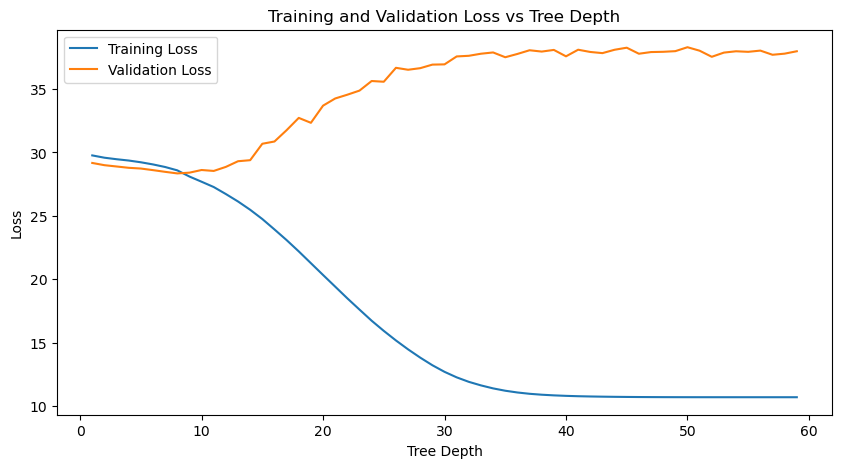

In [ ]:
nums = range(1, tree_reg.tree_.max_depth + 1)
plt.figure(figsize=(10, 5))
plt.plot(nums, train_lossi, label='Training Loss')
plt.plot(nums, val_lossi, label='Validation Loss')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Tree Depth')
plt.show()

As we see above, a depth of around 9 or 10 is a good value to balance out overfitting and underfitting

In [39]:
tree_final = DecisionTreeRegressor(max_depth=9, random_state=0)
tree_final.fit(train_data_ready, train_labels)
train_loss = get_rmse(tree_final, train_data_ready, train_labels)
val_loss = get_rmse(tree_final, val_data_ready, val_labels)
train_loss, val_loss

(28.10082630919434, 28.41120057118355)

## Tree structure

In [40]:
n_nodes = tree_final.tree_.node_count
children_left = tree_final.tree_.children_left
children_right = tree_final.tree_.children_right
features = tree_final.tree_.feature
thresholds = tree_final.tree_.threshold
values = tree_final.tree_.value

node_depth = np.zeros(n_nodes, np.int64)
is_leaves = np.zeros(n_nodes, bool)
stack = [(0,0)] # node 0 with depth 0

while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    # if the left and the right child of the node is not the same, the node is split-node
    is_split_node = (children_left[node_id] != children_right[node_id])
    # if the node is split-node, append the left and right child to stack
    if is_split_node:
        stack.append((children_left[node_id], depth+1))
        stack.append((children_right[node_id], depth+1))
    else:
        is_leaves[node_id] = True
    
print(f'The binary tree has {n_nodes} nodes and has the following structure')

for i in range(5):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node w. value={value}".format(
            space = node_depth[i] * "\t",
            node = i, value=values[i]
        ))
    else:
        print("{space}node={node} is a split node w. value={value}: "
              "go to node {left} if X[:, {feature}] <= {threshold:.3f} "
              "else to node {right}".format(
                  space = node_depth[i] * "\t",
                  node = i, value=values[i],
                  left = children_left[i], right = children_right[i],
                  threshold = thresholds[i], feature=features[i]
              ))

The binary tree has 747 nodes and has the following structure
node=0 is a split node w. value=[[1.42983345]]: go to node 1 if X[:, 17] <= 0.311 else to node 336
	node=1 is a split node w. value=[[-1.09019453]]: go to node 2 if X[:, 3] <= 0.581 else to node 165
		node=2 is a split node w. value=[[-2.49568899]]: go to node 3 if X[:, 0] <= 1.048 else to node 122
			node=3 is a split node w. value=[[-2.83500485]]: go to node 4 if X[:, 2] <= 0.075 else to node 59
				node=4 is a split node w. value=[[-0.19341525]]: go to node 5 if X[:, 14] <= -0.583 else to node 30


Two important features, 3 (node 1) and 17 (node 0), correspond to arrivial and departure humidity, which also agree with the correlation measure we made earlier. Let's se what node 336 respresent

In [133]:
node = 336
feat = features[node]
print(f'Feature {feat}')
train_data.iloc[:,feat].name

Feature 15


'dep_longitude'

So feature 15 is departure longitude. Similarly, the 14th feature will be another important one which is departure latitude. Finally, also appearing at the top of the tree, feature 0 (node 2) and 1 (node 59) which correspond to arrival latitude and longitude respectively also play an important role

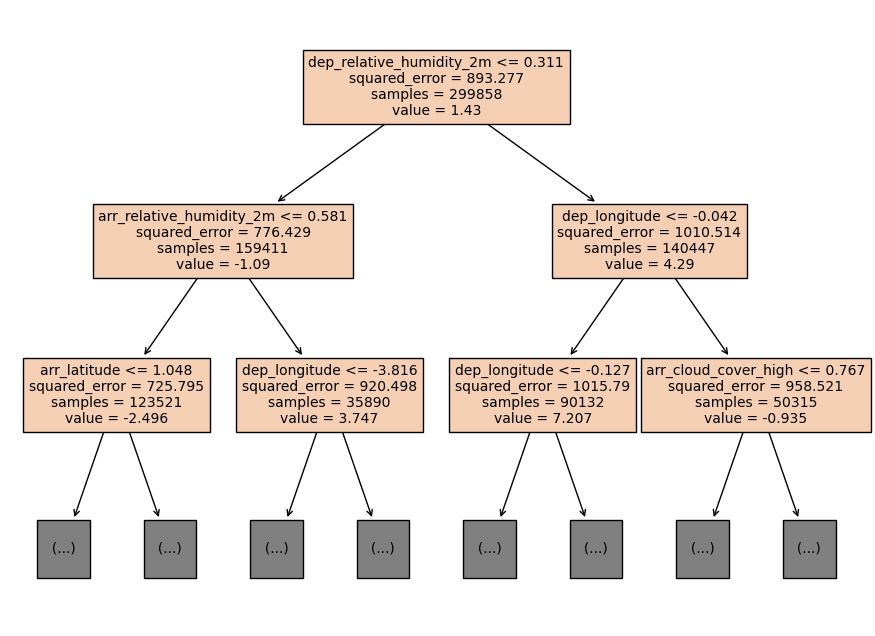

In [146]:
plt.figure(figsize=(11, 8))  # Adjust the figure size if needed
tree.plot_tree(tree_final, max_depth=2, filled=True, feature_names=train_data.columns.to_list(), fontsize=10);

## Decision path

In [48]:
X_val, y_val = val_data_ready.copy(), val_labels.copy()

node_indicator = tree_final.decision_path(X_val)
leaf_id = tree_final.apply(X_val)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_val[sample_id, features[node_id]] <= thresholds[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node:3d} : (X_val[{sample}, {feature:2d}] = {value:.3f}) "
        "{inequality} {threshold:.3f})".format(
            node=node_id,
            sample=sample_id,
            feature=features[node_id],
            value=X_val[sample_id, features[node_id]],
            inequality=threshold_sign,
            threshold=thresholds[node_id],
        )
    )

Rules used to predict sample 0:

decision node   0 : (X_val[0, 17] = 1.258) > 0.311)
decision node 336 : (X_val[0, 15] = 0.068) > -0.042)
decision node 564 : (X_val[0, 10] = 0.917) > 0.767)
decision node 670 : (X_val[0, 14] = -0.141) <= 0.210)
decision node 671 : (X_val[0,  2] = -0.083) <= 2.336)
decision node 672 : (X_val[0, 16] = -0.303) <= 0.091)
decision node 673 : (X_val[0, 23] = -0.690) <= 2.417)
decision node 674 : (X_val[0,  3] = 0.445) <= 1.027)
decision node 675 : (X_val[0, 12] = 0.209) > -0.322)
